In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#Define parameters and time grid
T = 1 # time horizon
nsteps = 252 # number of working days in a year
dt = T/nsteps # time step
t=np.linspace(0,T,num=nsteps) # observation times
r = .05 # Interest rate 
sigma = 0.2
S0 = 100 # initial stock price
K = 100 # Strike price
npaths = 1000

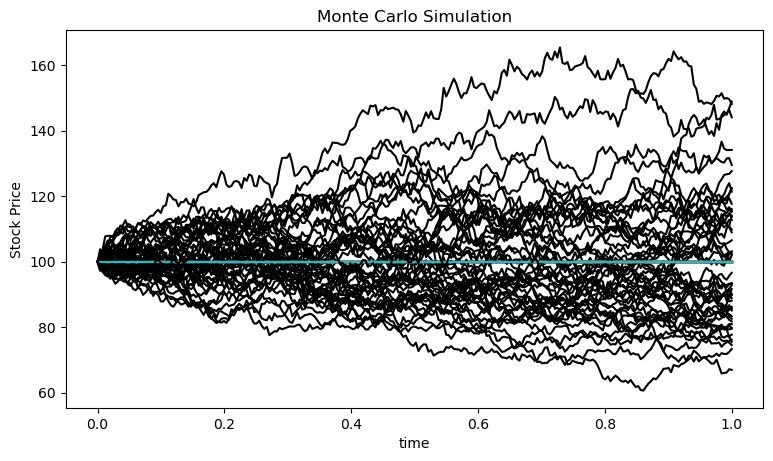

In [76]:
# Monte- Carlo with Euler-Maruyama Aproximation
S = np.zeros(npaths)
average = np.zeros(npaths)
for j in range(npaths):
    path = np.zeros(nsteps)
    path[0] = S0
    for i in range(1,nsteps):
        path[i] = path[i-1]*(1+(r*dt)+(sigma*np.random.randn()*np.sqrt(dt)))
    if j%20 == 0:
        plot0 = plt.figure(0,figsize=(9,5), dpi=100)
        plt.title("Monte Carlo Simulation")
        plt.xlabel("time")
        plt.ylabel("Stock Price")
        plt.plot(t,K*np.ones(len(t)))
        plt.plot(t,path, "black")
    average[j] = np.average(path)
    S[j] = path[i]

In [62]:
# Pricing Options

# European Options
EC = np.zeros(len(S))
EP = np.zeros(len(S))
for i in range(len(S)):
    EC[i] = np.exp(-r*T)*max(S[i]-K,0)
    EP[i] = np.exp(-r*T)*max(K-S[i],0)
EC_price = sum(EC)/npaths
EP_price = sum(EP)/npaths

print("European Call Price = ", EC_price)
print("European Put Price  = ",EP_price)

European Call Price =  10.451492675367259
European Put Price  =  5.04237074957625


In [63]:
# Binary Options
BC = np.zeros(len(S))
BP = np.zeros(len(S))
for i in range(len(S)):
    bc = 0
    if S[i] > K:
        bc =1
    BC[i] = np.exp(-r*T)*bc
    bp = 0
    if S[i] < K:
        bp =1
    BP[i] = np.exp(-r*T)*bp
    
BC_price = sum(BC)/npaths
BP_price = sum(BP)/npaths

print("Binary Call Price = ", BC_price)
print("Binary Put Price  = ",BP_price)

Binary Call Price =  0.5726401135494286
Binary Put Price  =  0.378589310951283


In [64]:
# Asian Options
AC = np.zeros(len(S))
AP = np.zeros(len(S))
for i in range(len(S)):
    AC[i] = np.exp(-r*T)*max(S[i]-average[i],0)
    AP[i] = np.exp(-r*T)*max(average[i]-S[i],0)
AC_price = sum(AC)/npaths
AP_price = sum(AP)/npaths

print("Asian Call Price = ", AC_price)
print("Asian Put Price  = ",AP_price)

Asian Call Price =  5.817965656212366
Asian Put Price  =  3.2645653316441448
